In [1]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset
df = pd.read_csv('Copper_Set.csv')
df.shape

(181673, 14)

In [3]:
df.head(3)
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

## Data Pre-Processing

In [4]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [5]:
df.head(10)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00
5,FE372230-29B1-4A29-BB73-CB9D3078C286,2021-04-01,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,102325,1668701718,2021-04-01,983.00
6,E1B47219-42C8-411D-AE46-AD5256DC4757,2021-04-01,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,611993,2021-07-01,18.00
7,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,2021-04-01,113.387124,30342192.0,32.0,Won,W,41.0,0.68,1220.0,1000944,611993,2021-01-01,931.00
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,2021-04-01,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,106786,1668701376,2021-07-01,1363.00
9,6E4D638C-A820-4A40-836F-C9D48BC65528,2021-04-01,630.626917,30202938.0,25.0,Won,W,41.0,1.50,1165.0,102325,1668701718,2021-04-01,983.00


## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [7]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [8]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [9]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [10]:
# material_ref has large set of null values, so replacing them with unknown because if we remove, it spoils our data. 
df['material_ref'].fillna('unknown', inplace=True)

In [11]:
df.isnull().sum()

id                2
item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [12]:
# deleting null values.
df = df.dropna()

<Axes: xlabel='thickness'>

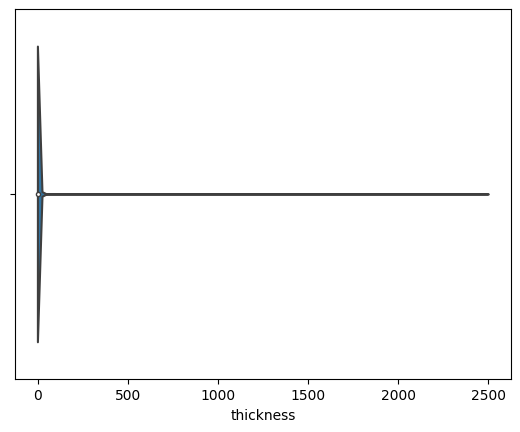

In [13]:
sns.violinplot(x=df["thickness"])

<Axes: xlabel='quantity tons'>

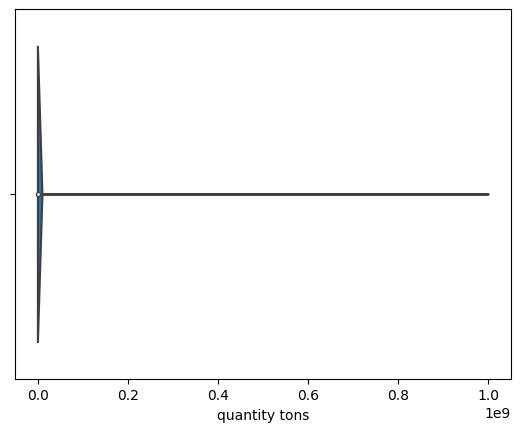

In [14]:
sns.violinplot(x=df["quantity tons"])

<Axes: xlabel='selling_price', ylabel='Density'>

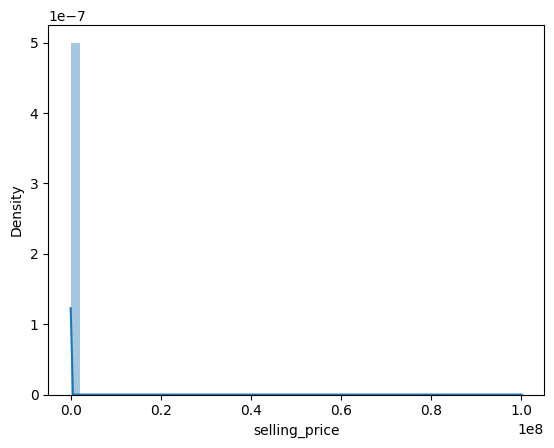

In [15]:
sns.distplot(df['selling_price'])

In [97]:
dfr=df.copy()

In [98]:
a = dfr['selling_price'] <= 0
print(a.sum())
dfr.loc[a, 'selling_price'] = np.nan

a = dfr['quantity tons'] <= 0
print(a.sum())
dfr.loc[a, 'quantity tons'] = np.nan


7
4


In [99]:
dfr.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

## Data Transformation

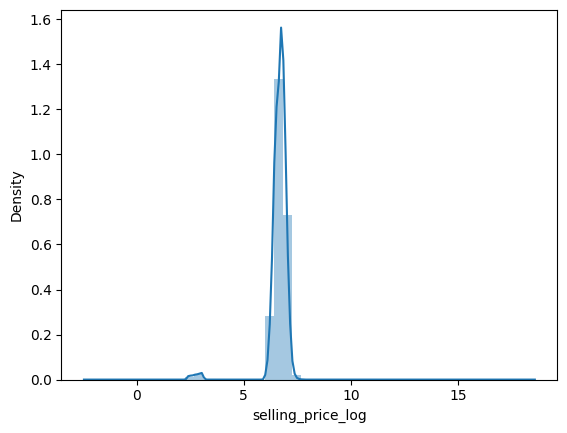

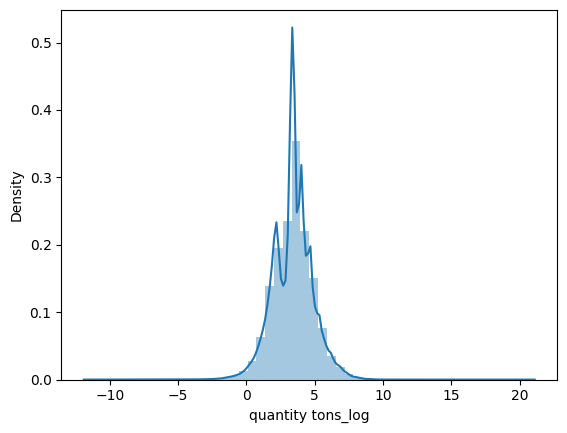

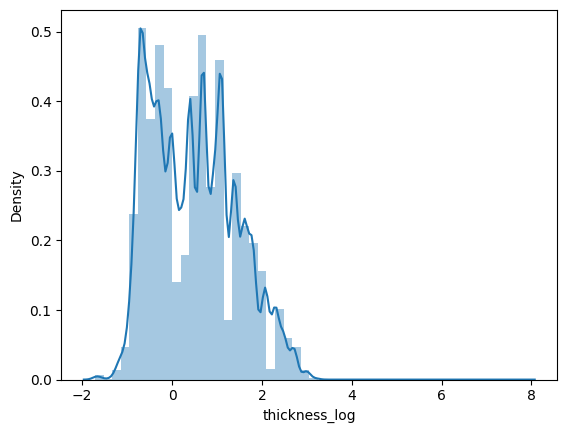

In [100]:
dfr['selling_price_log'] = np.log(dfr['selling_price'])
sns.distplot(dfr['selling_price_log'])
plt.show()

dfr['quantity tons_log'] = np.log(dfr['quantity tons'])
sns.distplot(dfr['quantity tons_log'])
plt.show()

dfr['thickness_log'] = np.log(dfr['thickness'])
sns.distplot(dfr['thickness_log'])
plt.show()



In [101]:
dfr

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,6.381816,4.629691,-0.040822
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,6.378426,5.337954,-0.051293
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,6.428105,1.443523,-0.342490
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,NaN,30200854.0,25.0,Won,W,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00,6.398595,NaN,-0.162519


In [102]:
#use Label encoder to convert categorical data into numerical data.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfr.status = le.fit_transform(dfr[['status']])
dfr['item type'] = le.fit_transform(dfr[['item type']])

In [22]:
dfr

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,7,5,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,7,5,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,7,6,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,7,3,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,7,5,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,7,5,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,6.381816,4.629691,-0.040822
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,7,5,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,6.378426,5.337954,-0.051293
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,7,5,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,6.428105,1.443523,-0.342490
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,NaN,30200854.0,25.0,7,5,41.0,0.85,1250.0,1001149,164141591,2020-07-01,601.00,6.398595,NaN,-0.162519


## Outliers

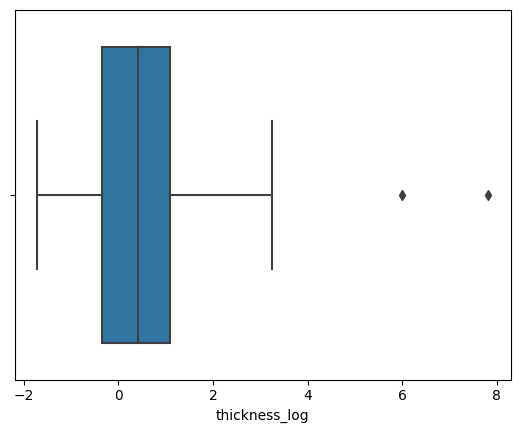

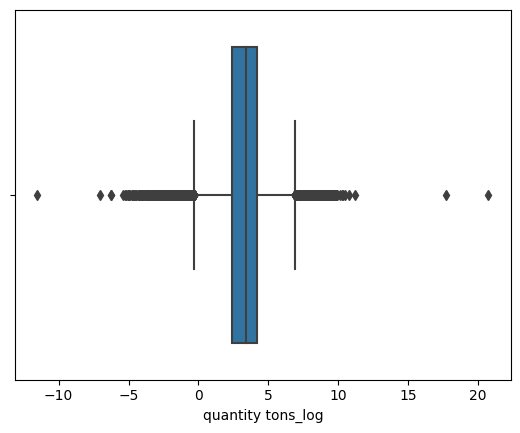

In [104]:
sns.boxplot(data=dfr, x="thickness_log")
plt.show()


sns.boxplot(data=dfr, x="quantity tons_log")
plt.show()

In [105]:
# IQR
# Calculate the upper and lower limits
Q1_tl = dfr['thickness_log'].quantile(0.25)
Q3_tl = dfr['thickness_log'].quantile(0.75)
IQR = Q3_tl - Q1_tl
lower_tl = Q1_tl - 1.5*IQR
upper_tl = Q3_tl + 1.5*IQR
 
    
print(lower_tl)
print(upper_tl)

# Create arrays of Boolean values indicating the outlier rows
upper_array_tl = np.where(dfr['thickness_log']>=upper_tl)[0]
lower_array_tl = np.where(dfr['thickness_log']<=lower_tl)[0]


-2.5396057928489957
3.281543137578373


In [25]:
print(lower_array_tl.sum())
print(upper_array_tl.sum())
print(upper_array_tl)
print(dfr.shape)

0
45038
[   40 44998]
(181631, 17)


New Shape:  (181629, 17)


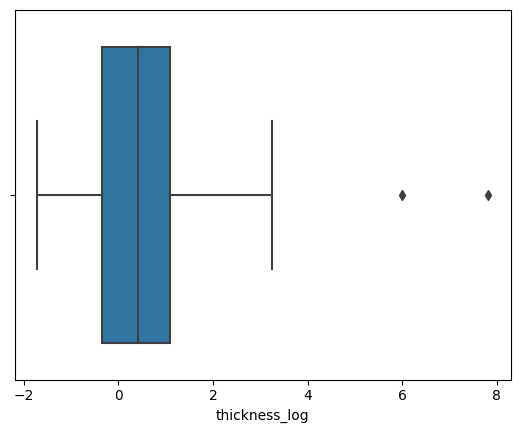

In [106]:
# Removing the outliers
dfr_dropped_outliers = dfr.drop(index=upper_array_tl, inplace=False)
 
# Print the new shape of the DataFrame
print("New Shape: ", dfr_dropped_outliers.shape)

sns.boxplot(data=dfr_dropped_outliers, x="thickness_log")
plt.show()

In [107]:
# IQR
# Calculate the upper and lower limits
Q1 = dfr_dropped_outliers['quantity tons_log'].quantile(0.25)
Q3 = dfr_dropped_outliers['quantity tons_log'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
    
print(lower)
print(upper)

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(dfr_dropped_outliers['quantity tons_log']>=upper)[0]




-0.32308264038211343
6.925327327725585


In [108]:
#print(len(lower_array))
print(len(upper_array))
print(upper_array)
print(dfr_dropped_outliers.shape)

1983
[   187    261    589 ... 180844 180906 181619]
(181629, 17)


New Shape:  (179646, 17)


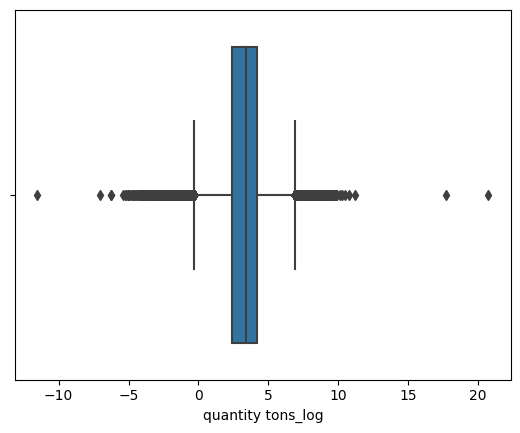

In [109]:
dfr_dropped_outliers_1 = dfr_dropped_outliers.drop(index=upper_array, inplace=False)
#dfr.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", dfr_dropped_outliers_1.shape)

sns.boxplot(data=dfr_dropped_outliers_1, x="quantity tons_log")
plt.show()

In [110]:
dfr_dropped_outliers_1.shape
dfr_dropped_outliers.shape

(181629, 17)

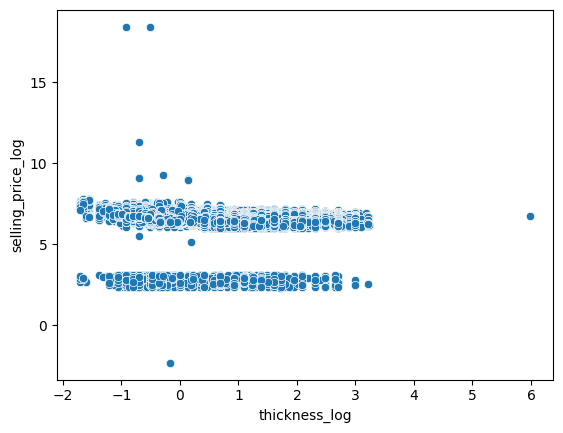

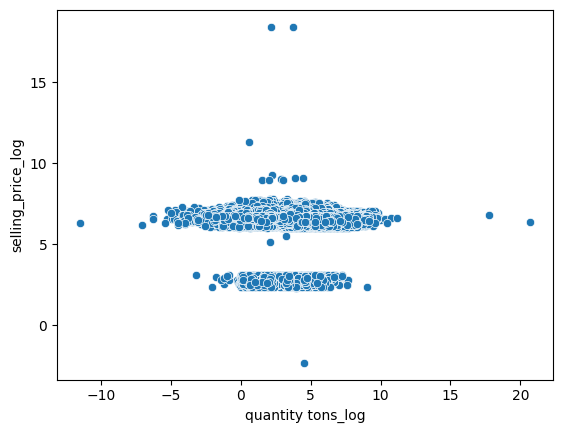

In [111]:
sns.scatterplot(data=dfr_dropped_outliers_1, x="thickness_log", y="selling_price_log")
plt.show()


sns.scatterplot(data=dfr_dropped_outliers_1, x="quantity tons_log", y="selling_price_log")
plt.show()

In [ ]:
dfr_dropped_outliers_1.shape

In [112]:
dfr_dropped_outliers_2.isnull().sum()

id                   0
item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        0
selling_price_log    0
quantity tons_log    0
thickness_log        0
dtype: int64

In [113]:
dfr_dropped_outliers_2 = dfr_dropped_outliers_1.dropna()

# Regression


In [114]:
df_data = dfr_dropped_outliers_2.copy()

In [115]:
#split data into X, y
X=df_data[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df_data['selling_price_log']

In [116]:
X

,quantity tons_log,status,item type,application,thickness_log,width,country,customer,product_ref
0,3.991779,7,5,10.0,0.693147,1500.0,28.0,30156308.0,1670798778
1,6.643822,7,5,41.0,-0.223144,1210.0,25.0,30202938.0,1668701718
2,5.956169,7,6,28.0,-0.967584,952.0,30.0,30153963.0,628377
3,5.310301,7,3,59.0,0.832909,1317.0,32.0,30349574.0,1668701718
4,6.666354,7,5,10.0,1.386294,2000.0,28.0,30211560.0,640665
...,...,...,...,...,...,...,...,...,...
181667,4.670802,7,5,41.0,-0.040822,1240.0,25.0,30200854.0,164141591
181668,4.629691,7,5,41.0,-0.040822,1220.0,25.0,30200854.0,164141591
181669,5.337954,7,5,41.0,-0.051293,1500.0,25.0,30200854.0,164141591
181670,1.443523,7,5,41.0,-0.342490,1250.0,25.0,30200854.0,164141591


In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(125744, 9)
(53891, 9)
(125744,)
(53891,)


In [118]:
X_train

,quantity tons_log,status,item type,application,thickness_log,width,country,customer,product_ref
55954,4.031168,6,5,10.0,0.916291,950.0,39.0,30161656.0,1670798778
150689,3.943565,7,5,15.0,0.405465,1000.0,77.0,30161540.0,628377
135738,1.879602,7,5,41.0,-0.051293,1240.0,25.0,30218705.0,611993
34482,3.102376,7,3,10.0,0.000000,1342.0,27.0,30217607.0,1693867550
70239,2.041859,7,5,10.0,0.693147,1000.0,78.0,30336052.0,164141591
...,...,...,...,...,...,...,...,...,...
123421,1.319396,7,2,15.0,2.302585,1500.0,26.0,30227447.0,640405
126083,3.824581,7,5,41.0,1.386294,1240.0,25.0,30202938.0,164141591
20718,5.330803,7,5,59.0,0.405465,1230.0,26.0,30201046.0,1670798778
18867,3.134459,7,5,10.0,1.252763,1560.0,28.0,30156308.0,640665


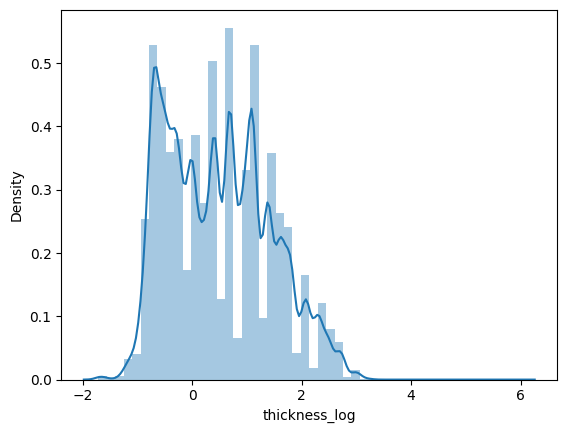

In [119]:
sns.distplot(X_train['thickness_log'])
plt.show()


# Scaling

In [120]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit_transform(X_train)

X_train

,quantity tons_log,status,item type,application,thickness_log,width,country,customer,product_ref
55954,4.031168,6,5,10.0,0.916291,950.0,39.0,30161656.0,1670798778
150689,3.943565,7,5,15.0,0.405465,1000.0,77.0,30161540.0,628377
135738,1.879602,7,5,41.0,-0.051293,1240.0,25.0,30218705.0,611993
34482,3.102376,7,3,10.0,0.000000,1342.0,27.0,30217607.0,1693867550
70239,2.041859,7,5,10.0,0.693147,1000.0,78.0,30336052.0,164141591
...,...,...,...,...,...,...,...,...,...
123421,1.319396,7,2,15.0,2.302585,1500.0,26.0,30227447.0,640405
126083,3.824581,7,5,41.0,1.386294,1240.0,25.0,30202938.0,164141591
20718,5.330803,7,5,59.0,0.405465,1230.0,26.0,30201046.0,1670798778
18867,3.134459,7,5,10.0,1.252763,1560.0,28.0,30156308.0,640665


In [ ]:
X_train.iloc[65843]

In [ ]:
X_train

# Correlation ( Feature selection)

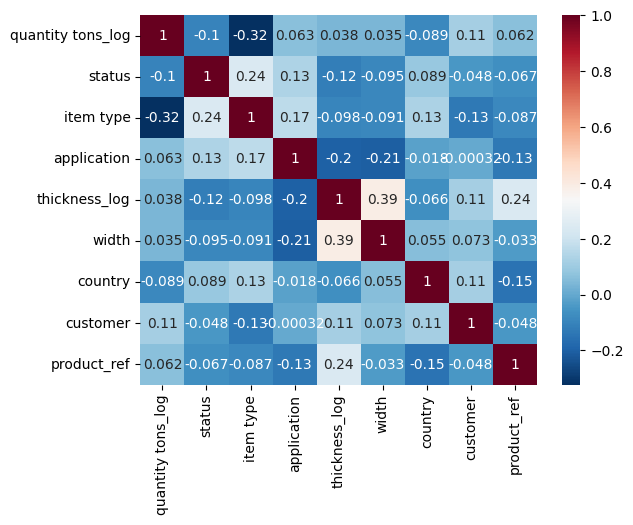

In [121]:
corr_matrix = X_train.corr(method='pearson') 

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show()
# no positive correlation, slighly negative correlated between thickness and application

# Regression

In [122]:
#import regression algorithm.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


### Linear Regression

In [123]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.intercept_)
print(lr.coef_)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

-5.725093352413854
[ 1.85642239e-02  5.14951419e-02  5.00160308e-03 -1.13256133e-03
 -9.24949358e-02  1.34877844e-05 -1.41115234e-03  4.00508411e-07
  3.04580805e-11]
0.08460108310452896
0.07568244911406508


In [124]:
X_test.iloc[0]

quantity tons_log    6.766276e+00
status               7.000000e+00
item type            5.000000e+00
application          5.600000e+01
thickness_log        1.098612e+00
width                9.000000e+02
country              2.600000e+01
customer             3.020601e+07
product_ref          6.406650e+05
Name: 87681, dtype: float64

### Metrics

In [125]:
from sklearn import metrics
y_pred=lr.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))

0.5404078190010063
0.2710020477023817
0.29204061083742444


### Lasso (L1)

In [44]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score,KFold

lr_lasso = linear_model.Lasso(alpha=0.1)
lr_lasso.fit(X_train, y_train)
print(lr_lasso.intercept_)
print(lr_lasso.coef_)
print(lr_lasso.score(X_train, y_train))
print(lr_lasso.score(X_test, y_test))

-1.63624949005197
[ 0.00000000e+00  3.73709326e-02  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.11242688e-04 -9.25037209e-04  2.73026850e-07
  4.23934651e-12]
0.05968574835507956
0.05449132620756181


### Ridge (L2)

In [45]:

lr_Ridge = linear_model.Ridge(alpha=0.5)
lr_Ridge.fit(X_train, y_train)
print(lr_Ridge.intercept_)
print(lr_Ridge.coef_)
print(lr_Ridge.score(X_train, y_train))
print(lr_Ridge.score(X_test, y_test))

-5.725070158819964
[ 1.85641779e-02  5.14951204e-02  5.00157764e-03 -1.13255772e-03
 -9.24943908e-02  1.34870529e-05 -1.41115082e-03  4.00507677e-07
  3.04579066e-11]
0.08460108310387426
0.07568247475853607


### RandomForest Regressor

In [46]:
rf = RandomForestRegressor(n_estimators = 20, max_depth = 4, random_state = 42)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test,y_test))

0.8789455931648871
0.8753185204467644


In [47]:
gbr = GradientBoostingRegressor(n_estimators = 20, learning_rate = 0.1, random_state =42)
gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.8631741427446481
0.8603883017194816


In [126]:
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [127]:
y_pred

array([6.28665918, 6.60259763, 6.42229843, ..., 6.77353964, 6.69435681,
       6.67219601])

In [128]:
y_test.iloc[0]

6.401917196727186

In [130]:
X_test.iloc[0]

quantity tons_log    6.766276e+00
status               7.000000e+00
item type            5.000000e+00
application          5.600000e+01
thickness_log        1.098612e+00
width                9.000000e+02
country              2.600000e+01
customer             3.020601e+07
product_ref          6.406650e+05
Name: 87681, dtype: float64

### metrics

In [52]:
#check MSE
metrics.mean_squared_error(y_test,y_pred)

0.027900926138466592

In [53]:
#check MAE
metrics.mean_absolute_error(y_test, y_pred)

0.11682737956108867

In [54]:
#R2 Score
print(metrics.r2_score(y_test,y_pred))

0.9116927072512069


# Classfication

In [131]:
df.status.value_counts()

Won                116004
Lost                34431
Not lost for AM     19568
Revised              4276
To be approved       4167
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [132]:
dfc = df.copy()

In [133]:
dfc = df[df['status'].isin(['Won', 'Lost'])]
len(dfc)

150435

In [134]:
dfc.status.value_counts()

Won     116004
Lost     34431
Name: status, dtype: int64

In [135]:
#use Label encoder to convert categorical data into numerical data.
le = LabelEncoder()
dfc.status = le.fit_transform(dfc[['status']])
dfc['item type'] = le.fit_transform(dfc[['item type']])

In [136]:
#split data into X, y
X = dfc[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]
y = dfc['status']

In [137]:
#split data into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105304, 9)
(45131, 9)
(105304,)
(45131,)


In [138]:
SS.fit_transform(X_train)

array([[-0.19158788, -0.64640583,  0.76779846, ..., -0.83442436,
        -0.49813806, -0.6602316 ],
       [-0.13114263, -0.7117355 ,  0.76779846, ..., -0.75279044,
        -0.0853274 ,  1.66956618],
       [-0.18996212,  0.42064545, -1.13783577, ..., -0.83442436,
        -0.48035394,  1.69738083],
       ...,
       [-0.17393705,  0.23710019,  0.76779846, ..., -0.54870564,
         1.59293535, -0.66023124],
       [-0.19955408,  1.17660306,  0.76779846, ..., -0.7936074 ,
        -0.4812663 , -0.66027123],
       [-0.12664849,  0.8406219 , -1.13783577, ..., -0.7936074 ,
        -0.47699924, -0.43215461]])

In [139]:
#import classifier algorithms.
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [64]:
dtc = DecisionTreeClassifier(max_depth = 8, random_state = 1)
dtc.fit(X_train, y_train)
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)
print(train_score)
print(test_score)

0.8468244321203373
0.8461589594735326


In [179]:
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.931066246296437
0.8978529170636591


In [180]:
y_predict = knn.predict(X_test)

In [189]:
X_test.iloc[0]

quantity tons    2.675338e+01
selling_price    7.590000e+02
item type        3.000000e+00
application      1.000000e+01
thickness        2.500000e+00
width            1.250000e+03
country          3.800000e+01
customer         3.028116e+07
product_ref      6.406650e+05
Name: 52360, dtype: float64

In [142]:
y_predict

array([0, 1, 1, ..., 1, 1, 1])

In [66]:
gbc = GradientBoostingClassifier(n_estimators = 30, learning_rate = 0.5,random_state = 28)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

0.8371381903821318
0.8386474928541358


In [67]:
rfc = RandomForestClassifier(n_estimators = 15, max_depth =6,random_state = 35)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.8214407809769809
0.8216746803749087


In [68]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

0.7716895844412368
0.7698034610356518


In [69]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=100,  learning_rate=0.5, max_depth= 10,objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_train, y_train)

0.9920325913545545

In [70]:
y_predict = xgb_model.predict(X_test)

In [181]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 7790,  2599],
       [ 2011, 32731]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

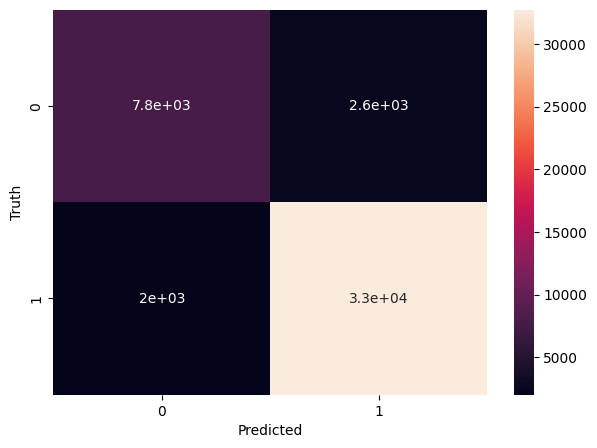

In [182]:
#draw heatmap
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [183]:
from sklearn.metrics import accuracy_score, f1_score,classification_report, roc_curve, auc

In [184]:
#check accuracy score.
accuracy_score(y_test, y_predict)

0.8978529170636591

In [185]:
f1_score(y_test,y_predict, average = 'weighted')

0.8967940624702836

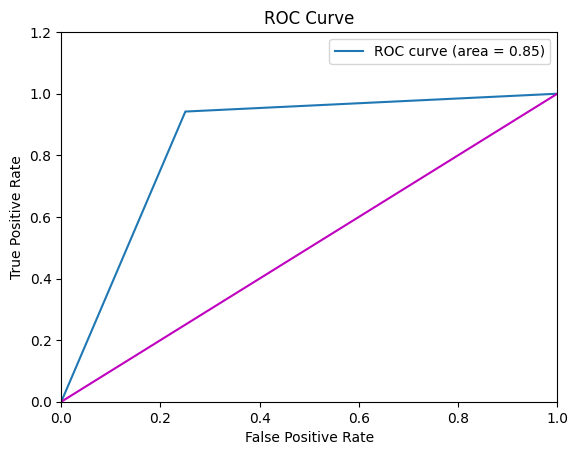

In [186]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [187]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77     10389
           1       0.93      0.94      0.93     34742

    accuracy                           0.90     45131
   macro avg       0.86      0.85      0.85     45131
weighted avg       0.90      0.90      0.90     45131



In [188]:
mean_squared_error(y_test, y_predict)

0.10214708293634088

In [72]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [73]:
scores = cross_val_score(xgb_model, X_train, y_train, cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())


Mean cross-validation score: 0.93


In [74]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


K-fold CV average score: 0.93


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=20, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

In [75]:
xgb_model.predict(X_test)

array([0, 1, 1, ..., 1, 1, 1])

In [76]:
y_pred= xgb_model.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 8579,  1810],
       [ 1334, 33408]], dtype=int64)

In [78]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

Text(58.222222222222214, 0.5, 'Truth')

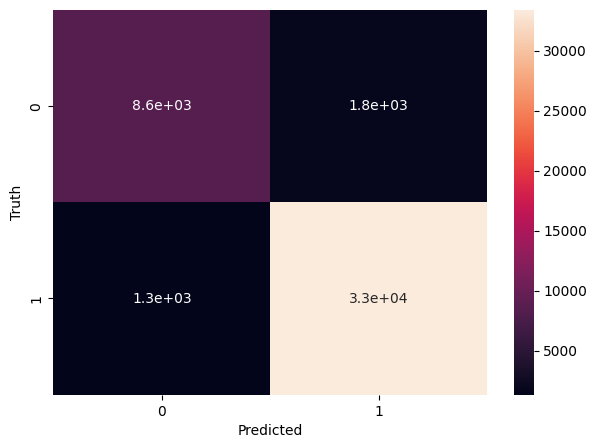

In [79]:
#draw heatmap
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
from sklearn.metrics import accuracy_score, f1_score,classification_report, roc_curve, auc

In [81]:
#check accuracy score.
accuracy_score(y_test, y_pred)

0.9303361325917884

In [82]:
f1_score(y_test,y_pred, average = 'weighted')

0.9297564568349349

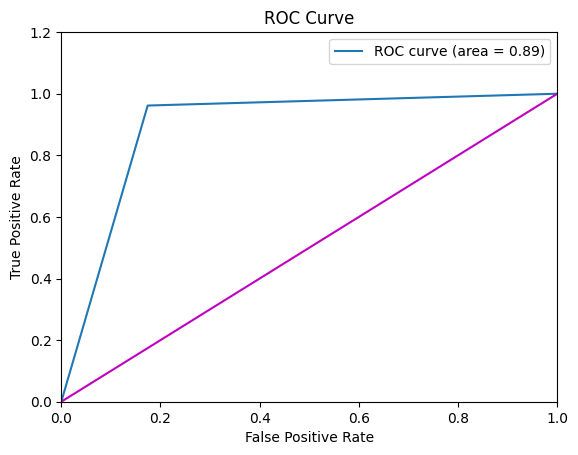

In [83]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85     10389
           1       0.95      0.96      0.96     34742

    accuracy                           0.93     45131
   macro avg       0.91      0.89      0.90     45131
weighted avg       0.93      0.93      0.93     45131

